## Reading jsons

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#plt.rcParams["figure.figsize"] = (7,6)
plt.rcParams["figure.figsize"] = (10,6)
#mpl.rcParams['figure.dpi'] = 800
#mpl.rcParams['figure.figsize'] = [60, 60]

import pandas as pd
import os,json

## Read file names
path_to_json = '.'
times_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_time.json')]
compact_time_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_time_compact.json')]
mem_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_mem.json')]


## Read json of no compact files
data_to_append = []
for js in times_files:
    data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_time = pd.concat(data_to_append, axis=1)
data_time = data_time.transpose()

## Read json of compact files
compact_data_to_append = []
for js in compact_time_files:
    compact_data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_time_compact = pd.concat(compact_data_to_append, axis=1)
data_time_compact = data_time_compact.transpose()

mem_data_to_append = []
for js in mem_files:
    mem_data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_mem = pd.concat(mem_data_to_append, axis=1)
data_mem = data_mem.transpose()

#data_time = pd.DataFrame(columns=['time_triangulation_generation','time_to_label_max_edges', 'time_to_label_frontier_edges', 'time_to_label_seed_edges', 'time_to_traversal_and_repair', 'time_to_traversal', 'time_to_repair', 'polygons', 'n_frontier_edges', 'n_barrier_edge_tips', 'n_half_edges', 'n_faces', 'n_vertices'])
data_time['Polylla_time'] = data_time['time_to_label_max_edges'] + data_time['time_to_label_frontier_edges'] + data_time['time_to_label_seed_edges'] + data_time['time_to_traversal_and_repair']
data_time_compact['Polylla_time'] = data_time_compact['time_to_label_max_edges'] + data_time_compact['time_to_label_frontier_edges'] + data_time_compact['time_to_label_seed_edges'] + data_time_compact['time_to_traversal_and_repair']

data_time['Label_phase'] = data_time['time_to_label_max_edges'] + data_time['time_to_label_frontier_edges'] + data_time['time_to_label_seed_edges']
data_time_compact['Label_phase'] = data_time_compact['time_to_label_max_edges'] + data_time_compact['time_to_label_frontier_edges'] + data_time_compact['time_to_label_seed_edges']

## Convert byte to gb
data_mem['mem_triangulation'] = data_mem['mem_triangulation']/1000000000
data_mem['mem_compact_triangulation'] = data_mem['mem_compact_triangulation']/1000000000
data_mem['mem_gen_triangulation'] = data_mem['mem_gen_triangulation']/1000000000
data_mem['mem_gen_compact_triangulation'] = data_mem['mem_gen_compact_triangulation']/1000000000
data_mem['mem_polylla'] = data_mem['mem_polylla']/1000000000
data_mem['mem_gen_polylla'] = data_mem['mem_gen_polylla']/1000000000
data_mem['mem_polylla'] = data_mem['mem_polylla'] - data_mem['mem_gen_triangulation']

## Convert ms to minutes

data_time['time_triangulation_generation'] = data_time['time_triangulation_generation']/60000
data_time['time_to_label_max_edges'] = data_time['time_to_label_max_edges']/60000
data_time['time_to_label_frontier_edges'] = data_time['time_to_label_frontier_edges']/60000
data_time['time_to_label_seed_edges'] = data_time['time_to_label_seed_edges']/60000
data_time['time_to_traversal_and_repair'] = data_time['time_to_traversal_and_repair']/60000
data_time['time_to_traversal'] = data_time['time_to_traversal']/60000
data_time['time_to_repair'] = data_time['time_to_repair']/60000
data_time['Polylla_time'] = data_time['Polylla_time']/60000
data_time['Label_phase'] = data_time['Label_phase']/60000
data_time_compact['time_triangulation_generation'] = data_time_compact['time_triangulation_generation']/60000
data_time_compact['time_to_label_max_edges'] = data_time_compact['time_to_label_max_edges']/60000
data_time_compact['time_to_label_frontier_edges'] = data_time_compact['time_to_label_frontier_edges']/60000
data_time_compact['time_to_label_seed_edges'] = data_time_compact['time_to_label_seed_edges']/60000
data_time_compact['time_to_traversal_and_repair'] = data_time_compact['time_to_traversal_and_repair']/60000
data_time_compact['time_to_traversal'] = data_time_compact['time_to_traversal']/60000
data_time_compact['time_to_repair'] = data_time_compact['time_to_repair']/60000
data_time_compact['Polylla_time'] = data_time_compact['Polylla_time']/60000
data_time_compact['Label_phase'] = data_time_compact['Label_phase']/60000


# Time comparision

## Comp time triangulation generation

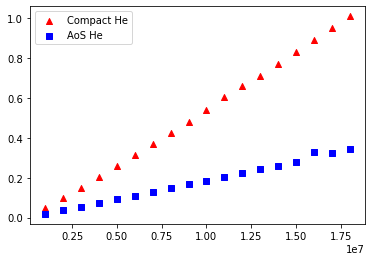

In [3]:
#data_time.columns.to_list()
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_triangulation_generation, c="red",marker="^", label='Compact He')
plt.scatter(data_time.n_vertices, data_time.time_triangulation_generation,c="blue" ,marker="s",  label='AoS He')
plt.legend()

## Comptime Polylla generation

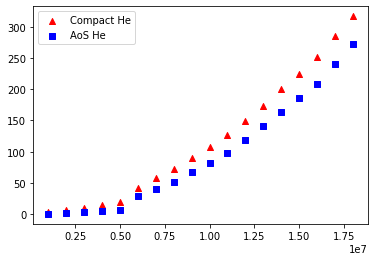

In [4]:
#data_time.columns.to_list()
plt.scatter(data_time_compact.n_vertices, data_time_compact.Polylla_time, c="red",marker="^", label='Compact He')
plt.scatter(data_time.n_vertices, data_time.Polylla_time, c="blue" ,marker="s",  label='AoS He')

plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Polylla phases time comp

## label max edges

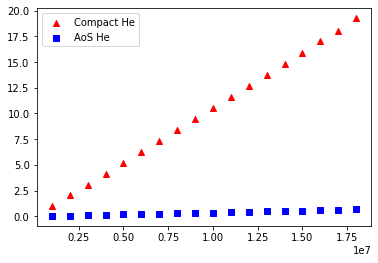

In [5]:
#data_time.columns.to_list()
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_max_edges, c="red",marker="^", label='Compact He')
plt.scatter(data_time.n_vertices, data_time.time_to_label_max_edges, c="blue" ,marker="s",  label='AoS He')

plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## label frontier edges

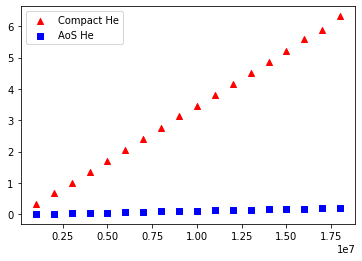

In [6]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_frontier_edges, c="red",marker="^", label='Compact He')
plt.scatter(data_time.n_vertices, data_time.time_to_label_frontier_edges, c="blue" ,marker="s",  label='AoS He')

plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## label seed edges

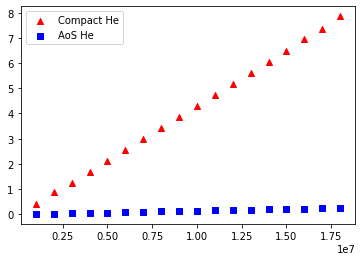

In [7]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_seed_edges, c="red",marker="^", label='Compact He')
plt.scatter(data_time.n_vertices, data_time.time_to_label_seed_edges, c="blue" ,marker="s",  label='AoS He')

plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## traversal

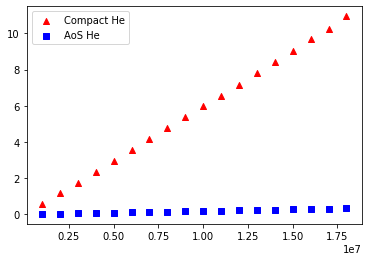

In [8]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_traversal, c="red",marker="^", label='Compact He')
plt.scatter(data_time.n_vertices, data_time.time_to_traversal, c="blue" ,marker="s",  label='AoS He')

plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## Repair

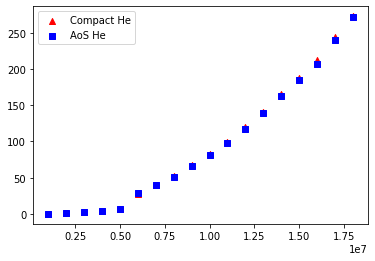

In [9]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_repair, c="red",marker="^", label='Compact He')
plt.scatter(data_time.n_vertices, data_time.time_to_repair, c="blue" ,marker="s",  label='AoS He')

plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Memory comp

## Mem Comp triangulation

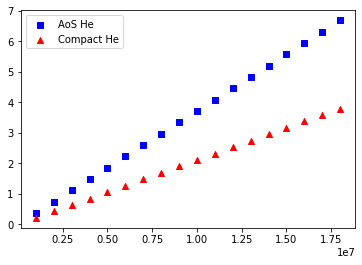

In [10]:
#long long mem_triangulation, mem_polylla, mem_compact_triangulation, mem_compact_polylla;
#long long mem_gen_triangulation, mem_gen_polylla, mem_gen_compact_triangulation, mem_gen_compact_polylla;
#long num_vertices, num_triangles, num_halfedges;

plt.scatter(data_mem.num_vertices, data_mem.mem_triangulation, c="blue" ,marker="s",  label='AoS He')
plt.scatter(data_mem.num_vertices, data_mem.mem_compact_triangulation, c="red",marker="^", label='Compact He')
plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## Mem comp gen triangulation

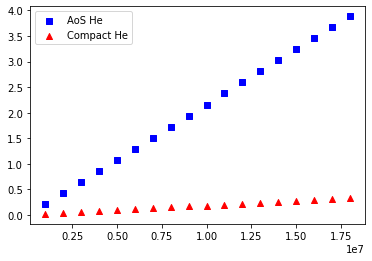

In [11]:
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_triangulation, c="blue" ,marker="s",  label='AoS He')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_compact_triangulation, c="red",marker="^", label='Compact He')
plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


# Time generation data structure and mesh

Text(0, 0.5, 'Time in minutes')

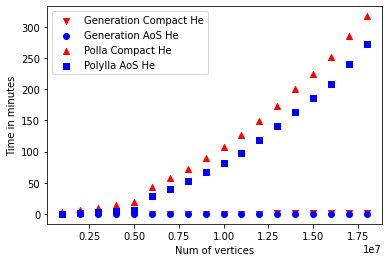

In [12]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_triangulation_generation, c="red",marker="v", label='Generation Compact He')
plt.scatter(data_time.n_vertices, data_time.time_triangulation_generation,c="blue" ,marker="o",  label='Generation AoS He')

#data_time.columns.to_list()
plt.scatter(data_time_compact.n_vertices, data_time_compact.Polylla_time, c="red",marker="^", label='Polla Compact He')
plt.scatter(data_time.n_vertices, data_time.Polylla_time, c="blue" ,marker="s",  label='Polylla AoS He')

plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")

# Time by label phases

Text(0, 0.5, 'Time in minutes')

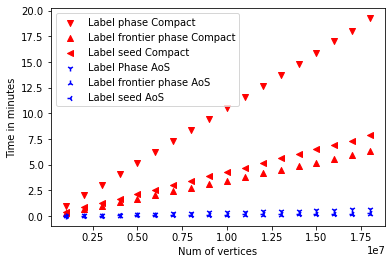

In [13]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_max_edges, c="red",marker="v", label='Label phase Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_frontier_edges, c="red",marker="^", label='Label frontier phase Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_seed_edges, c="red",marker="<", label='Label seed Compact')

plt.scatter(data_time.n_vertices, data_time.time_to_label_max_edges, c="blue" ,marker="1",  label='Label Phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_label_frontier_edges, c="blue" ,marker="2",  label='Label frontier phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_label_seed_edges, c="blue" ,marker="3",  label='Label seed AoS')
plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")


# Time by polylla phases

Text(0, 0.5, 'Time in minutes')

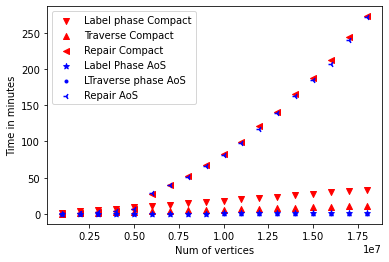

In [14]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.Label_phase, c="red",marker="v", label='Label phase Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_traversal, c="red",marker="^", label='Traverse Compact')
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_repair, c="red",marker="<", label='Repair Compact')

plt.scatter(data_time.n_vertices, data_time.Label_phase, c="blue" ,marker="*",  label='Label Phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_traversal, c="blue" ,marker=".",  label='LTraverse phase AoS')
plt.scatter(data_time.n_vertices, data_time.time_to_repair, c="blue" ,marker="3",  label='Repair AoS')
plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Time in minutes")


# Memory comp general

Text(0, 0.5, 'Memory in gigabytes')

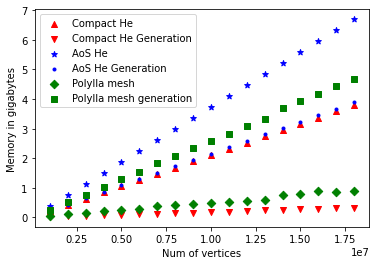

In [15]:

plt.scatter(data_mem.num_vertices, data_mem.mem_compact_triangulation, c="red",marker="^", label='Compact He')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_compact_triangulation, c="red",marker="v", label='Compact He Generation')

plt.scatter(data_mem.num_vertices, data_mem.mem_triangulation, c="blue" ,marker="*",  label='AoS He')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_triangulation, c="blue" ,marker=".",  label='AoS He Generation')

plt.scatter(data_mem.num_vertices, data_mem.mem_polylla, c="green" ,marker="D",  label='Polylla mesh ')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_polylla, c="green" ,marker="s",  label='Polylla mesh generation')


plt.legend()

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel("Num of vertices")
plt.ylabel("Memory in gigabytes")
